                                          Project- Insurance Cost Analysis

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters

Parameter   	Description                          Content type
age	            Age in years	                      integer
gender        	Male or Female	                      integer (1 or 2)
bmi	            Body mass index	                      float
no_of_children 	Number of children	                  integer
smoker	        Whether smoker or not	              integer (0 or 1)
region	        Which US region - NW, NE, SW, SE	  integer (1,2,3 or 4 respectively)
charges      	Annual Insurance charges in USD	       float

Install the required libraries-

In [ ]:
%pip install pandas matplotlib seaborn scikit-learn
%pip install numpy



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline


                                            Task-1: Import the dataset into a pandas dataframe. 




1-Print the first 5 rows of the dataframe to confirm successful loading,there are currently no headers in the CSV file.

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520



2- Add the headers to the dataframe, as mentioned in the project scenario

In [ ]:
df.columns=['age','gender','bmi','no_of_childre','smoker','region','charges']
df.head()

,age,gender,bmi,no_of_childre,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


3-Now, replace the '?' entries with 'NaN' values.

In [ ]:
df.replace('?',np.nan,inplace=True)

                                                Task 2 : Data Wrangling

1-Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2768 non-null   object 
 1   gender         2772 non-null   int64  
 2   bmi            2772 non-null   float64
 3   no_of_childre  2772 non-null   int64  
 4   smoker         2765 non-null   object 
 5   region         2772 non-null   int64  
 6   charges        2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handling missing data:

For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info().

In [ ]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2772 non-null   int64  
 1   gender         2772 non-null   int64  
 2   bmi            2772 non-null   float64
 3   no_of_childre  2772 non-null   int64  
 4   smoker         2772 non-null   int64  
 5   region         2772 non-null   int64  
 6   charges        2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


/var/folders/kq/z63hc_q56b3f69w7jbg9bv4w0000gn/T/ipykernel_28397/863333469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
/var/folders/kq/z63hc_q56b3f69w7jbg9bv4w0000gn/T/ipykernel_28397/863333469.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Also note, that the charges column has values which are more than 2 decimal places long. Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.

In [ ]:

df['charges']=np.round(df['charges'],2)
print(df.head())

   age  gender     bmi  no_of_childre  smoker  region   charges
0   19       1  27.900              0       1       3  16884.92
1   18       2  33.770              1       0       4   1725.55
2   28       2  33.000              3       0       4   4449.46
3   33       2  22.705              0       0       1  21984.47
4   32       2  28.880              0       0       1   3866.86


                                                Task 3 : Exploratory Data Analysis (EDA)

1-Implement the regression plot for charges with respect to bmi.

(0.0, 54.9885)

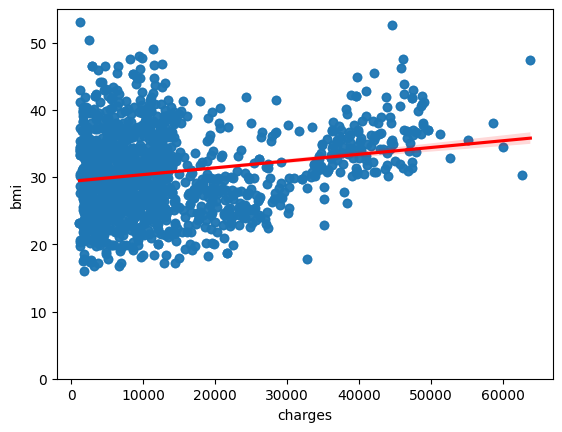

In [ ]:
sns.regplot(x='charges',y='bmi',data=df,line_kws={'color':'red'})
plt.ylim(0,)

2-Implement the box plot for charges with respect to smoker

<Axes: xlabel='smoker', ylabel='charges'>

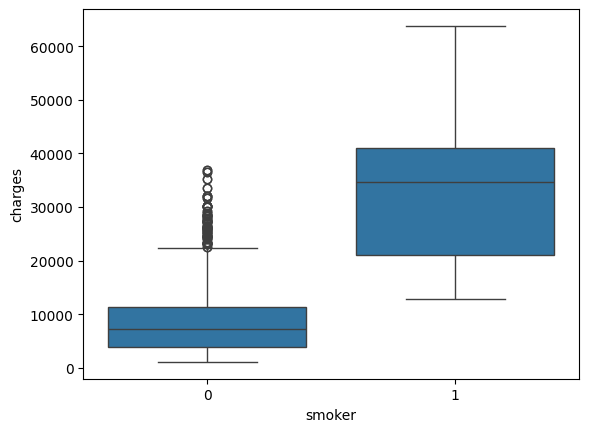

In [ ]:
sns.boxplot(x='smoker',y='charges',data=df)

3-Print the correlation matrix for the dataset

In [ ]:
print(df.corr())

                    age    gender       bmi  no_of_childre    smoker  \
age            1.000000 -0.026046  0.113048       0.037574 -0.023286   
gender        -0.026046  1.000000  0.042924       0.016020  0.082326   
bmi            0.113048  0.042924  1.000000      -0.001492  0.011489   
no_of_childre  0.037574  0.016020 -0.001492       1.000000  0.006362   
smoker        -0.023286  0.082326  0.011489       0.006362  1.000000   
region        -0.007167  0.022213  0.271119      -0.025717  0.054077   
charges        0.298624  0.062837  0.199846       0.066442  0.788783   

                 region   charges  
age           -0.007167  0.298624  
gender         0.022213  0.062837  
bmi            0.271119  0.199846  
no_of_childre -0.025717  0.066442  
smoker         0.054077  0.788783  
region         1.000000  0.054058  
charges        0.054058  1.000000  


                                                    Task 4 : Model Development


1-Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R^2 score of this model

In [ ]:
lm=LinearRegression()
lm.fit(df[['smoker']],df['charges'])
print(lm.score(df[['smoker']],df['charges']))

0.6221791733924185


2-Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2 score of this model. You should see an improvement in the performance

In [ ]:
Z = df[["age", "gender", "bmi", "no_of_childre", "smoker", "region"]]
lm.fit(Z,df['charges'])
print(lm.score(Z,df['charges']))

0.7504083820289634


3-Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance

In [ ]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype('float')
pipe.fit(Z,df['charges'])
ypipe=pipe.predict(Z)
print(r2_score(df['charges'],ypipe))

0.8452576213500093


                                                    Task 5 : Model Refinement

1- Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Z,df['charges'],test_size=0.2, random_state=1)

2- Initialize a Ridge regressor that used hyperparameter alpha=0.1 .Fit the model using training data data subset. Print the R^2 score for the testing data

In [ ]:
ridgemodel=Ridge(alpha=0.1)
ridgemodel.fit(x_train,y_train)
yhat=ridgemodel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582403


3- Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R^2 score for the testing subset.

In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
ridgemodel.fit(x_train_pr, y_train)
y_hat = ridgemodel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608065
